In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'  # Disable GPU usage
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  #  Suppress all logs (INFO, WARNING, and ERROR)

import tensorflow as tf

# Training Neural Networks with TenserFlow and Keras - Basic Concepts

## Basic Structure of a Neural Network

A neural network model is defined using layers that transform input data into desired outputs. 
Layers are the basic building blocks of neural networks. 

In TensorFlow layer consists of a tensor-in tensor-out computation function  and some state, held in TensorFlow variables (the layer's weights).

Each layer performs a specific mathematical operation and passes the processed data to the next layer. 

- **Layers**: Building blocks of neural networks.
- **Input Layer**: Receives input data.
- **Hidden Layers**: Perform transformations on data.
- **Output Layer**: Produces final predictions.


### What is a Tensor in ML ?

All major Deep Learning frameworks (e.g., TensorFlow, PyTorch, Keras, and MXNet) use tensors as their fundamental data structure for model inputs, outputs, weights, and computations.

<a href="./images/Tensor_Units.jpg"><img src='./images/Tensor_Units.jpg' style=height:12em></a><br>
   *Image source: https://en.wikipedia.org/wiki/Tensor_(machine_learning)*

A **tensor** in ML is a multi-dimensional array that is used to represent data. Tensors can have various shapes and data types, making them the basic building blocks of Deep Learning models. They are used to define inputs, outputs, weights, and activations within neural networks.

Tensors are simmilar to numpay arrays, but can leverage parallel processing on GPUs through deep learning frameworks like TensorFlow and PyTorch, making them highly efficient for large-scale computations in neural networks.

#### Key Points:
1. **Multi-Dimensional Array**: A tensor can be a scalar (0D), vector (1D), matrix (2D), or higher-dimensional array (3D, 4D, etc.).
2. **Shape**: Defined by the number of dimensions and the size of each dimension. For example:
   - `Scalar`: Shape `()`
   - `Vector`: Shape `(3,)`
   - `Matrix`: Shape `(3, 4)`
   - `4D Tensor`: Shape `(batch_size, height, width, channels)`
3. **Data Types**: Tensors can have different data types, such as `float32`, `int32`, etc.
4. **Manipulation**: Tensors support various operations like addition, multiplication, reshaping, and slicing.

#### Tensor Example in Keras:

In [2]:
# Creating a 2D tensor (Matrix)
tensor_example = tf.constant([[1.0, 2.0], [3.0, 4.0]])
print(tensor_example)

tf.Tensor(
[[1. 2.]
 [3. 4.]], shape=(2, 2), dtype=float32)


## Define Model Architecture

There are multiple ways to build a model in Keras depending on the complexity and structure of the neural network.

### Sequential Model

The **Sequential** model is a linear stack of layers, where each layer has exactly one input and one output. It is used for simple feed-forward architectures without branching or skipping connections.

**Example: Simple Feed-Forward Network**


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input

model_1 = Sequential([
    Input(shape=(2,), name='Input'),
    Dense(32, activation='relu', name='Hidden_1'),
    Dense(16, activation='relu',name='Hidden_2'),
    Dense(1, activation='sigmoid',name='Output')
], name='Sequential')


model_1.summary()

Model: "Sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

### Functional API

The **Functional API** in Keras is more flexible than the Sequential model, allowing for complex architectures such as multi-input, multi-output models, or models with shared layers. Instead of stacking layers linearly, the Functional API enables defining models by connecting layers like a graph, which provides greater control over the network structure.

- **Define Input Layer**: Start by defining the input layer using `Input()`.
- **Connect Layers**: Use layer instances (e.g., `Dense`) and connect them using function calls.
- **Create the Model**: Pass the input and output layers to the `Model()` class.

**Example:**

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define the input layer
inputs = Input(shape=(2,))

# Define the layers
x1 = Dense(32, activation='relu', name="Hidden_1")(inputs)   # Hidden Layer 1
x2 = Dense(16, activation='relu', name="Hidden_2")(x1)       # Hidden Layer 2
outputs = Dense(1, activation='sigmoid',name="Output")(x2)  # Output Layer

# Create the model using the Functional API
model_2 = Model(inputs=inputs, outputs=outputs, name="Functional")
model_2.summary()

Model: "Functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

### Model Subclassing

**Model Subclassing** provides maximum flexibility and customization for building neural networks in Keras. It involves creating a custom class that inherits from the `tf.keras.Model` class and defining the network layers and their forward pass within the class. This approach is particularly useful when building complex models that require dynamic behavior or custom training loops.

- **Create a Custom Class**: Inherit from `tf.keras.Model` and define layers in the `__init__` method.
- **Define the Forward Pass**: Implement the `call()` method, which specifies how the data flows through the layers.

**Example:**

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

# Define a custom model by subclassing tf.keras.Model
class CustomModel(tf.keras.Model):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.name = 'Subclassed'
        self.dense1 = Dense(32, activation='relu', name='Hidden_1')   # Hidden Layer 1
        self.dense2 = Dense(16, activation='relu', name='Hidden_2')   # Hidden Layer 2
        self.out = Dense(1, activation='sigmoid', name='Output')      # Output Layer

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.out(x)

# Instantiate the custom model
model_3 = CustomModel()

# Pass a dummy input to build the model (e.g., batch size 1, input shape 2)
dummy_input = tf.zeros((1, 2))
model_3(dummy_input)  # Call the model with the dummy input to build it

model_3.summary()


Model: "Subclassed"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_1 (Dense)                │ (1, 32)                │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (1, 16)                │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (1, 1)                 │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

## Typical Activation Functions Used in Keras

<a href="./images/ActivationFunctions.jpeg"><img src='./images/ActivationFunctions.jpeg' style=height:12em></a><br>
*Image source: https://www.linkedin.com/posts/iamprakhargupta_amazing-cheat-sheet-of-activation-functions-activity-7041231669860712449-OrVq/*

Activation functions play a crucial role in neural networks, helping the model learn complex patterns by introducing non-linearity. In Keras, various activation functions are commonly used, each serving different purposes. Below are some of the most frequently used activation functions and their typical use cases:

### 1. **ReLU (Rectified Linear Unit)**
- **Syntax**: `activation='relu'`
- **Description**:  
  The most widely used activation function for hidden layers in neural networks, especially in convolutional and dense layers. It outputs the input value if it is positive; otherwise, it outputs zero.
- **Formula**:  
  $$ f(x) = \max(0, x) $$
- **Use Cases**:  
  - Helps address the vanishing gradient problem.
  - Efficient for deep networks.
- **Advantages**:  
  - Computationally efficient.
  - Introduces sparsity (many neurons are inactive).
- **Disadvantages**:  
  - Can lead to the **dying ReLU** problem (neurons get stuck at zero and stop learning).
  

### 2. **Sigmoid**
- **Syntax**: `activation='sigmoid'`
- **Description**:  
  The sigmoid activation squashes the input values between 0 and 1, making it suitable for binary classification tasks.
- **Formula**:  
  $$ f(x) = \frac{1}{1 + e^{-x}} $$
- **Use Cases**:  
  - Often used in the **output layer** for binary classification.
  - Good for modeling probabilities.
- **Advantages**:  
  - Provides a probabilistic interpretation.
- **Disadvantages**:  
  - Can cause **vanishing gradients** in deep networks.  
#### Vanishing Gradients Problem

The **vanishing gradients** problem occurs when the gradients become **exponentially small** during backpropagation in deep networks. This causes very small weight updates, making the model training **slow** or **unable to learn** effectively, especially in early layers. It commonly happens with activation functions like **sigmoid** and **tanh**.

### 3. **Tanh (Hyperbolic Tangent)**
- **Syntax**: `activation='tanh'`
- **Description**:  
  Similar to sigmoid but scales the output between -1 and 1, making it zero-centered.
- **Formula**:  
  $$ f(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}} $$
- **Use Cases**:  
  - Often used in recurrent neural networks (RNNs).
  - Helps with learning complex patterns in sequential data.
- **Advantages**:  
  - Zero-centered, making it more effective for gradient updates.
- **Disadvantages**:  
  - Suffers from **vanishing gradient** problems like the sigmoid function.

### 4. **Softmax**
- **Syntax**: `activation='softmax'`
- **Description**:  
  It is a generalization of the logistic function to multiple dimensions.
  Converts a vector of raw scores into probabilities, where the sum of all probabilities is 1. Typically used in the output layer for multi-class classification.
- **Formula**:  
  $$ f(x_i) = \frac{e^{x_i}}{\sum_{j} e^{x_j}} $$
- **Use Cases**:  
  - Multi-class classification problems.
- **Advantages**:  
  - Outputs a clear probability distribution across classes.
- **Disadvantages**:  
  - Can be sensitive to outliers, leading to large gradients.

### 5. **Leaky ReLU**
- **Syntax**: `activation='leaky_relu'` (or use `tf.keras.layers.LeakyReLU(alpha=0.3)`)
- **Description**:  
  A variant of ReLU that allows a small, non-zero gradient when the input is negative, addressing the **dying ReLU** problem.
- **Formula**:  
  $$ f(x) = \begin{cases} 
      x & \text{if } x \geq 0 \\ 
      \alpha x & \text{if } x < 0 
      \end{cases} $$
- **Use Cases**:  
  - Good for deep networks prone to dying ReLU.
- **Advantages**:  
  - Prevents neurons from becoming inactive.
- **Disadvantages**:  
  - Adds an extra hyperparameter (`alpha`).


### 6. **Swish**
- **Syntax**: `activation='swish'` (or use `tf.keras.activations.swish`)
- **Description**:  
  A newer activation function proposed by Google that outperforms ReLU on some deep networks. It’s a smooth, non-monotonic function.
- **Formula**:  
  $$ f(x) = x \cdot \text{sigmoid}(x) $$
- **Use Cases**:  
  - Useful for deep networks in vision and NLP tasks.
- **Advantages**:  
  - Smooth, non-monotonic, avoids the dying ReLU problem.
- **Disadvantages**:  
  - Computationally more expensive.

### Choosing the Right Activation Function
- **For Hidden Layers**: Use `ReLU` or its variants (`Leaky ReLU`, `Swish`).
- **For Binary Classification**: Use `sigmoid` in the **output layer**.
- **For Multi-Class Classification**: Use `softmax` in the **output layer**.
- **For Regression**: Use **no activation** (or `linear`).

### Summary
Activation functions are a crucial component in Keras models, transforming the linear outputs of each layer into non-linear ones, enabling the network to learn complex patterns. Choose the activation function based on the type of task and the layer’s role in the network.

For more details, refer to the [Keras Documentation](https://keras.io/api/layers/activations/)


## Compile the Model

Refenrence: [Keras: compile method](https://keras.io/api/models/model_training_apis/#compile-method)

Model compilation is a crucial step that defines how the model learns and optimizes its weights. During compilation, the optimizer, loss function, and evaluation metrics are specified. These parameters determine how the model will be trained and evaluated.

### Key Components:
1. **Optimizer**:
   - Controls how the model updates its weights during training.
   - Common optimizers: `adam`, `sgd`, `rmsprop`.
   - Example: `optimizer='adam'`

2. **Loss Function**:
   - Measures the difference between the true labels and model predictions.
   - For classification: `binary_crossentropy`, `categorical_crossentropy`.
   - For regression: `mean_squared_error`.
   - Example: `loss='binary_crossentropy'`

3. **Metrics**:
   - Used to evaluate the model's performance during training and testing.
   - Common metrics: `accuracy`, `precision`, `recall`.
   - Example: `metrics=['accuracy']`

### Example: Model Compilation

In [6]:
# Compile the model with optimizer, loss function, and metrics
model_1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

**Explanation**:

`optimizer='adam'`: Uses the Adam optimizer, which is a popular choice due to its adaptive learning rate and efficient performance.

`loss='binary_crossentropy'`: Specifies the loss function for binary classification tasks.

`metrics=['accuracy']`: Sets the evaluation metric to track the accuracy of the model during training.


## Plot the Model

Refenrence: [Keras: plotmodel](https://keras.io/api/utils/model_plotting_utils/#plotmodel-function)

To plot a visual representation of your Keras model architecture, you can use the plot_model utility provided by Keras. This utility creates a diagram that helps you visualize the structure of your model, showing all the layers, connections, and their respective shapes

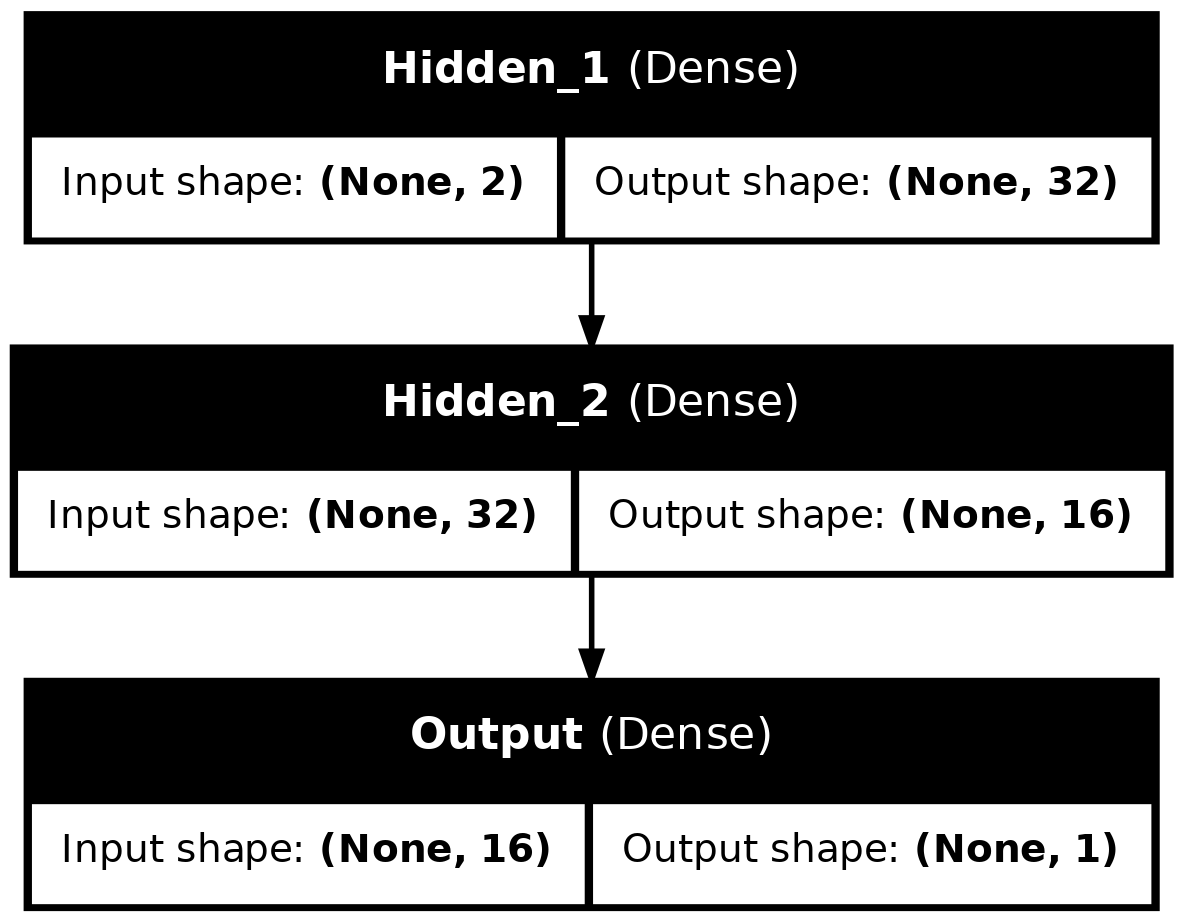

In [7]:
# Plot the model
tf.keras.utils.plot_model(model_1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Training the Model

Refenrence: [Keras: fit method](https://keras.io/api/models/model_training_apis/#fit-method)

Training a model in Keras is done using the `fit` method. This method performs forward and backward passes through the network, updates the model weights based on the loss function, and monitors performance metrics over multiple epochs. During training, you can also specify data validation to track the model’s progress on unseen data.

### Key Parameters of the `fit` Method:
1. **x**: Input data (e.g., training features).
2. **y**: Target labels corresponding to the input data.
3. **epochs**: Number of complete passes through the entire training dataset.
4. **batch_size**: Number of samples per gradient update. Smaller batches use less memory but may result in less stable updates.
5. **validation_split**: Fraction of training data to be used for validation (e.g., `0.2` for 20% validation data). The Validation set is used during training to monitor and optimize the model (e.g., early stopping).
6. **callbacks**: List of callback functions to monitor the training (e.g., early stopping, model checkpointing).

### Example: Training a Simple Model

*For this simple demo, we'll set*:

`epochs=2`: The model will train for 2 complete passes over the training data.

`batch_size=3`: For each update, 3 samples will be processed before updating the model weights.

`validation_split=0`.2: Keras will reserve 20% of the training data for validation.

In [8]:
import numpy as np

# Generate dummy training data with 5 samples and 2 features
x_train = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y_train = np.array([0, 1, 0, 1, 0])

# Train the model using the fit method
history = model_1.fit(
    x_train, y_train,
    epochs=10,                 # Number of epochs to train the model
    batch_size=3,              # Number of samples per batch
    validation_split=0.2       # Use 20% of the data for validation
)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - accuracy: 0.4444 - loss: 0.7088 - val_accuracy: 0.0000e+00 - val_loss: 1.0144
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5556 - loss: 0.6709 - val_accuracy: 0.0000e+00 - val_loss: 1.0448
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4444 - loss: 0.6921 - val_accuracy: 0.0000e+00 - val_loss: 1.0580
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5556 - loss: 0.6537 - val_accuracy: 0.0000e+00 - val_loss: 1.0709
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.5556 - loss: 0.6669 - val_accuracy: 0.0000e+00 - val_loss: 1.0594
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4444 - loss: 0.7011 - val_accuracy: 0.0000e+00 - val_loss: 1.0485
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4444 - loss: 0.6991 - val_accuracy: 0.0000e+00 - val_loss: 1.0534
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4444 - loss: 0.6879 - val_accurac

### Training vs Validation Metrics

- **Training Accuracy / Loss**:  
  Indicates how well the model is learning on the **training data**. High training accuracy and low loss mean the model fits the training data well.

- **Validation Accuracy (`val_accuracy`) / Validation Loss (`val_loss`)**:  
  Measures the model’s performance on **validation data** set aside during training. 
  
  A large gap between training and validation metrics (e.g., high accuracy but low `val_accuracy`) suggests **overfitting**.


### Return value: `history` object

The History object returned by model.fit() can be used for more detailed analysis of trainin, visualization, and further tunning actions. 

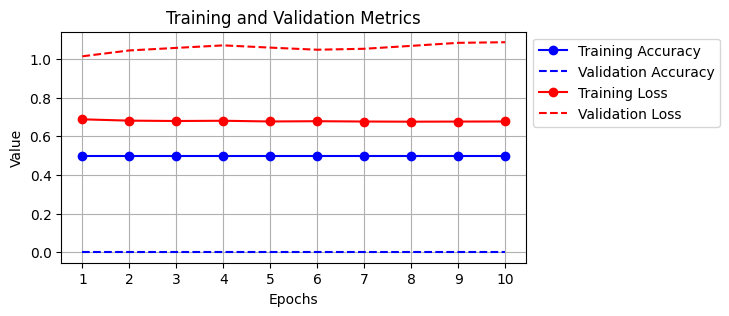

In [9]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    epochs = range(1, len(history.history['accuracy']) + 1)  # Create a range of epochs [1, 2, ..., n]

    plt.figure(figsize=(6, 3))  # Set the figure size

    # Plot training and validation accuracy
    plt.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy')  # Blue dots and line
    plt.plot(epochs, history.history['val_accuracy'], 'b--', label='Validation Accuracy')  # Blue dashed line

    # Plot training and validation loss
    plt.plot(epochs, history.history['loss'], 'ro-', label='Training Loss')  # Red dots and line
    plt.plot(epochs, history.history['val_loss'], 'r--', label='Validation Loss')  # Red dashed line

    # Add labels, legend, and set grid
    plt.title('Training and Validation Metrics')
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.xticks(epochs)
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.show()

# Example usage
plot_training_history(history)


## Evaluating the Model

Refenrence: [Keras: evaluate method](https://keras.io/api/models/model_training_apis/#evaluate-method)

After training, the model needs to be evaluated to assess its performance on unseen test data. In Keras, this is done using the `evaluate` method, which computes the loss and other metrics defined during model compilation.

*Key Points:*
- **Purpose**: Measure how well the model generalizes to new data.
- **Output**: Returns the loss value and any other specified metrics, such as accuracy.

### Key Parameters of the `evaluate` Method:
1. **x**: Test features or input data (e.g., `x_test`).
2. **y**: Test labels corresponding to the input data (e.g., `y_test`).
3. **batch_size**: Number of samples per batch. Defaults to 32.
4. **verbose**: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch).

### Example: Evaluating a Model on Test Data


In [10]:
# Generate dummy test data (5 samples, 2 features each)
x_test = np.array([[2, 4], [3, 6], [4, 8], [5, 10], [6, 12]])
y_test = np.array([0, 1, 0, 1, 0])  # Binary labels

# Evaluate the model on test data
test_loss, test_accuracy = model_1.evaluate(x_test, y_test, batch_size=32, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4000 - loss: 0.8016
Test Loss: 0.8016044497489929
Test Accuracy: 0.4000000059604645


### Return value

The `model.evaluate()` method returns a **tuple** containing the **loss** and the specified **metrics** values for the given dataset.

- If the model has a single loss function and a single metric, it returns a tuple with:
  ```python
  (loss, metric1)
  ```

- If multiple metrics were specified during model.compile(), it returns a tuple with all of them:
  ```python
  (loss, metric1, metric2, ...)
  ```



## Predicting with the Model

Refenrence: [Keras: predict method](https://keras.io/api/models/model_training_apis/#predict-method)

Once the model is trained and evaluated, it can be used to make predictions on new, unseen data. This is done using the `predict` method in Keras, which returns the predicted values for the input data.

*Key Points*
- **Purpose**: To generate predictions on new data (e.g., class labels, probabilities, or regression values).
- **Output**: Returns an array of predicted values based on the model's learned weights.

### Key Parameters of the `predict` Method:
1. **x**: Input data for which predictions are to be made (e.g., `x_new`).
2. **batch_size**: Number of samples per batch. Defaults to 32.
3. **verbose**: Verbosity mode (0 = silent, 1 = progress bar).

### Example: Making Predictions on New Data

In [11]:
# Predict on new input data

# Generate new input data (3 samples, 2 features each)
x_new = np.array([[7, 14], [8, 16], [9, 18]])

predictions = model_1.predict(x_new, batch_size=32, verbose=1)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0.742316 ]
 [0.7707486]
 [0.7969026]]


### Return Value

The `predict()` method in Keras returns a **NumPy array** containing the predicted values for each input sample.   
The shape and contents of the returned array depend on the model architecture and the type of problem being solved.

#### Typical Scenarios:

1. **Binary Classification**:
  - If your model has a **single output neuron** with a `sigmoid` activation, the `predict()` method returns an array of **probabilities**.
  - **Shape**: `(num_samples, 1)`  
  - **Example**:  
    For `x_new = [[7, 14], [8, 16], [9, 18]]`, the output might look like:  
      ```python
      [[0.6285038 ],
        [0.64950544],
        [0.66994363]]
     ```
  - **Interpretation**: Each value represents the **probability** of the sample belonging to the positive class (`1`). 
  
  - **Convert probabilities** 
    You can convert probabilities into binary classes using a threshold (e.g., 0.5).

In [12]:
predictions = np.array([
      [0.3285038],
      [0.54950544],
      [0.86994363]
])
binary_predictions = (predictions >= 0.5).astype(int)
print(binary_predictions)

[[0]
 [1]
 [1]]


2. **Multi-Class Classification**:
   - If your model has **multiple output neurons** with a `softmax` activation, the `predict()` method returns an array of **probability distributions** over all classes.
   - **Shape**: `(num_samples, num_classes)`  
   - **Example**:  
    For a 3-class classification problem:  
     ```python
     [[0.1, 0.3, 0.6],   # Predicted probability distribution for sample 1
      [0.7, 0.2, 0.1],   # Predicted probability distribution for sample 2
      [0.2, 0.5, 0.3]]   # Predicted probability distribution for sample 3
     ```
   - **Interpretation**: Each value in a row corresponds to the probability of the sample belonging to a particular class. 
   
   - **Convert probabilities**:
      You can use `np.argmax` to convert these into class labels.
      ```python
      np.argmax(predictions, axis=1)
      ```

      - axis=1: Operates along the rows, meaning it looks for the highest probability within each row.
      - Returns the index of the maximum value in each row, which corresponds to the predicted class.

In [13]:
# Example of predicted probabilities for a 3-class classification problem
predictions = np.array([
      [0.2, 0.3, 0.5],  # Probabilities for Sample 1
      [0.1, 0.7, 0.2],  # Probabilities for Sample 2
      [0.3, 0.4, 0.3]   # Probabilities for Sample 3
])

# Convert probabilities to class labels using `argmax`
class_labels = np.argmax(predictions, axis=1)
print(class_labels)

[2 1 1]


3. **Regression**:
   - If your model is a **regression model** (without activation or using linear activation), the `predict()` method returns an array of **predicted values**.
   - **Shape**: `(num_samples, output_neurons)`  
   - **Example**:  
     ```python
     [[4.5],   # Predicted value for sample 1
      [5.8],   # Predicted value for sample 2
      [3.9]]   # Predicted value for sample 3
     ```
   - **Interpretation**: Each value represents the predicted output for the corresponding input sample.

#### Summary:
- The output format of `predict()` depends on the **model architecture** and the **task type**:
  - **Binary classification**: Probabilities for positive class (`1`).
  - **Multi-class classification**: Probability distribution over all classes.
  - **Regression**: Predicted values directly.


## Save the model 

Keras offers multiple formats to save models, each with its own use case and benefits. Understanding these formats can help you choose the right one for your application:

### **Save in Native Keras Format (`.keras`)**
- **Description**:  
  The new, recommended format for saving Keras models starting from TensorFlow 2.11 and above. It is designed to replace the `.h5` format.
- **Usage**:

  Use:
  `model.save('my_model.keras')`

- **File**:  
  Creates a single `my_model.keras` file.
  
- **Advantages**:
  - Preserves complete information about the model (architecture, training configuration, and optimizer state).
  - Future-proof, with better long-term support from Keras.
  
- **Disadvantages**:
  - May not be backward compatible with older versions of Keras.


### **Save in HDF5 Format (`.h5`)**
- **Description**:  
  HDF5 (`Hierarchical Data Format version 5`) is a single-file format that stores the entire model architecture, weights, and optimizer state.
- **Usage**:  
  This was the standard format in Keras for a long time.

  Use:
  `model.save('model.h5')`
  
- **File**:  
  Creates a single `model.h5` file.
- **Advantages**:
  - Easy to share as a single file.
  - Compatible with a wide range of Keras and TensorFlow versions.
- **Disadvantages**:
  - Considered a **legacy** format now.
  - Lacks some of the new features supported by the native `.keras` format.


### Choosing the Right Format
- **For most use cases**: Use the **native `.keras` format** for long-term support.
- **For compatibility with older tools**: Use the **HDF5 (`.h5`)** format.

In [14]:
# Save the model in the recommended Keras format
model_1.save('my_model.keras')

In [15]:
# Save the model in the legacy HDF5 format
model_1.save('model.h5')

## Load Saved Model

To use a previously trained and saved Keras model in your application, you need to **load** it first. Keras provides the `tf.keras.models.load_model()` function, which allows you to restore the complete model, including its architecture, weights, and training configuration.


In [16]:
# Load the saved Keras model
model = tf.keras.models.load_model('./model.h5')

The warning is because we compiled our model with metrics, but on load the compiled metrics are not fully built until an evaluation or training step is performed.

If you only want to use the model for predictions (e.g., model.predict()), this warning does not affect functionality, and you can safely ignore it. You can continue using model.predict() without re-compiling.

If you plan to further train or evaluate the model with the original metrics, after loading the model, re-compile it to ensure all metrics are built properly

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])